<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/autoProverbs/blob/main/autoProverbious.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np

def getSpaces(text):
    spaces = []
    for i in range(len(text)):
        if text[i] == ' ':
            spaces.append(i)
    return spaces


def getBiggestSmallest(arraio,n) :
  for index,curr  in enumerate(arraio):
    if curr > n:
      return arraio[index-1]
  return 9000

def divitedText(text, SizeLine):
  spaces = np.array(getSpaces(text))
  volta = 0
  while 1:
    #print(spaces)
    volta+=1
    local = getBiggestSmallest(spaces,SizeLine*volta)
    if local == 9000:
      break
    text = text[:local] + '\n' + text[local+1:]
  return text

In [19]:
import json
import tweepy
from random import randrange
from datetime import date

today = date.today().day

with open('/content/drive/MyDrive/biblia/bibleNvi.json','r') as f:
  bible = json.load(f)
with open('/content/drive/MyDrive/keysOfNsei.json','r') as f:
  keys = (json.load(f))[0]

for book  in bible :
  if (book["abbrev"] == "pv"):
    proverbios = book
    break

cap = proverbios['chapters']

cd = cap[today-1]
limit = len(cd)
versicleIndex = randrange(0,limit)

dailyVersicle = cd[versicleIndex]
finalResult = (f"""{dailyVersicle}
provérbios({today}:{versicleIndex+1})""")
print(finalResult)

Não seja como aqueles que, com um aperto de mãos, empenham-se com outros e se tornam fiadores de dívidas;
provérbios(22:26)


15
(1080, 1350)


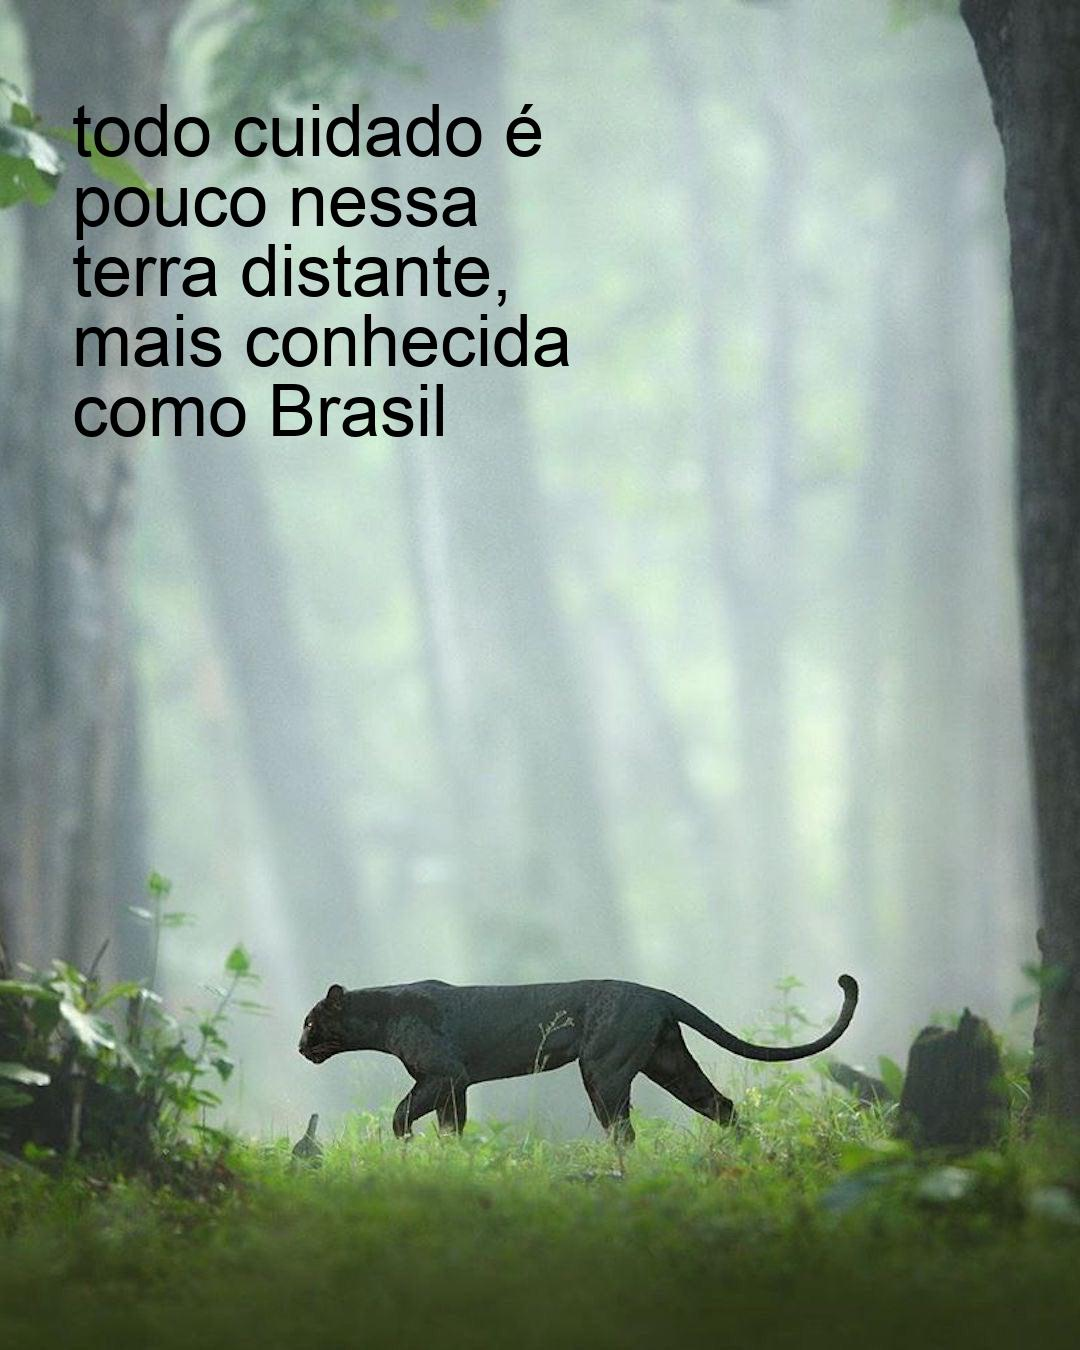

In [22]:
import numpy as np
import IPython.display as d
#import cv2
from PIL import Image, ImageDraw, ImageFont
import math
#from funcs import *

text = 'todo cuidado é pouco nessa terra distante, mais conhecida como Brasil'
imgPath = '/content/drive/MyDrive/62af6d8.jpg'
img = Image.open(imgPath)
[width, height] = img.size
cantofact = 15
sizeOfCanto = int(width/cantofact)
diminuit = 15
fontSize=int(width/diminuit)
[initialWidth,initialHeight] = map(lambda x: int(x/cantofact),[width,height])
limitLine = int(diminuit)
print(limitLine)
convertedText = divitedText(text,limitLine)
print(img.size)

idr = ImageDraw.Draw(img)

font = ImageFont.truetype('/content/drive/MyDrive/fontes/arial.ttf' ,int(fontSize))

idr.text((initialWidth, initialHeight), convertedText, fill=(0, 0, 0), font=font)


newPath = '/teste atual/essa.jpg'

img.save(newPath)
d.Image(newPath)

In [23]:
auth = tweepy.OAuthHandler(keys['chave1'],keys['chave2'])
auth.set_access_token(keys['chave3'],keys['chave4'])
api = tweepy.API(auth)

#versicle = f'({today}:{versicleIndex+1})'

api.update_with_media(newPath,'teste c a api 1')

Status(_api=<tweepy.api.API object at 0x7f34229b4590>, _json={'created_at': 'Fri Jul 22 23:54:07 +0000 2022', 'id': 1550630301407264769, 'id_str': '1550630301407264769', 'text': 'teste c a api 1 https://t.co/seWrKaVSrD', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1550630300186714112, 'id_str': '1550630300186714112', 'indices': [16, 39], 'media_url': 'http://pbs.twimg.com/media/FYTyCtyWIAA_DuJ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FYTyCtyWIAA_DuJ.jpg', 'url': 'https://t.co/seWrKaVSrD', 'display_url': 'pic.twitter.com/seWrKaVSrD', 'expanded_url': 'https://twitter.com/nsei_4002/status/1550630301407264769/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 544, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1080, 'h': 1350, 'resize': 'fit'}, 'medium': {'w': 960, 'h': 1200, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 1550630300186714112, 'id_st